Abdul Saboor (20L-1113 | BDS-5A1)

### Pre-requisites

In [53]:
#importing ibraries to use
import pandas as pd
import numpy as np

In [54]:
data=pd.read_excel('my_iris.xlsx')

In [55]:
# checking data
data.describe()

,Unnamed: 0,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width
count,150.000000,130.000000,130.000000,130.000000,100.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.901538,3.005385,4.115385,1.453000,11.686667,-6.108000,15.034667,-4.794667
std,43.445368,0.835082,0.410013,1.621200,0.685117,1.656132,0.867189,7.057682,3.052643
min,0.000000,4.300000,2.000000,1.100000,0.100000,8.600000,-8.800000,4.000000,-10.000000
25%,37.250000,5.125000,2.800000,3.350000,1.100000,10.200000,-6.600000,6.400000,-7.200000
50%,74.500000,5.850000,3.000000,4.500000,1.500000,11.600000,-6.000000,17.400000,-5.200000
75%,111.750000,6.475000,3.200000,5.200000,2.000000,12.800000,-5.600000,20.400000,-1.200000
max,149.000000,7.900000,4.100000,6.900000,2.500000,15.800000,-4.000000,27.600000,-0.400000


# Data Cleaning

### Dropping redundant columns

In [56]:
data=data.drop([data.columns[0]],axis=1)
data.describe()

# Till now only first column is dropped as indexes of dataframe are duplicating with indexes of dataset.
#  So dropping index column will have no effect on data.

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width
count,130.000000,130.000000,130.000000,100.000000,150.000000,150.000000,150.000000,150.000000
mean,5.901538,3.005385,4.115385,1.453000,11.686667,-6.108000,15.034667,-4.794667
std,0.835082,0.410013,1.621200,0.685117,1.656132,0.867189,7.057682,3.052643
min,4.300000,2.000000,1.100000,0.100000,8.600000,-8.800000,4.000000,-10.000000
25%,5.125000,2.800000,3.350000,1.100000,10.200000,-6.600000,6.400000,-7.200000
50%,5.850000,3.000000,4.500000,1.500000,11.600000,-6.000000,17.400000,-5.200000
75%,6.475000,3.200000,5.200000,2.000000,12.800000,-5.600000,20.400000,-1.200000
max,7.900000,4.100000,6.900000,2.500000,15.800000,-4.000000,27.600000,-0.400000


### Structuring and Standardising data

In [57]:
data['sepal width']=data['sepal width'].apply(lambda x: -1*x) # for sepal width
data['petal width']=data['petal width'].apply(lambda x: -1*x) # for petal width
data.describe()

# The column of sepal width and petal width have all negative values, however a measurement can not be negative. 
# This may be considered a human error and all values should be converted to positive values

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width
count,130.000000,130.000000,130.000000,100.000000,150.000000,150.000000,150.000000,150.000000
mean,5.901538,3.005385,4.115385,1.453000,11.686667,6.108000,15.034667,4.794667
std,0.835082,0.410013,1.621200,0.685117,1.656132,0.867189,7.057682,3.052643
min,4.300000,2.000000,1.100000,0.100000,8.600000,4.000000,4.000000,0.400000
25%,5.125000,2.800000,3.350000,1.100000,10.200000,5.600000,6.400000,1.200000
50%,5.850000,3.000000,4.500000,1.500000,11.600000,6.000000,17.400000,5.200000
75%,6.475000,3.200000,5.200000,2.000000,12.800000,6.600000,20.400000,7.200000
max,7.900000,4.100000,6.900000,2.500000,15.800000,8.800000,27.600000,10.000000


### Filling missing values

In [58]:
# for petal depth column
temp=pd.DataFrame({'original':data['petal depth'],'interpolation':data['petal depth'].interpolate(),'mean':data['petal depth'].fillna(data['petal depth'].mean()),'median':data['petal depth'].fillna(data['petal depth'].median())})
temp.describe()

,original,interpolation,mean,median
count,130.000000,149.000000,150.000000,150.000000
mean,4.115385,3.780201,4.115385,4.166667
std,1.621200,1.751021,1.508475,1.514169
min,1.100000,1.100000,1.100000,1.100000
25%,3.350000,1.600000,3.825000,3.825000
50%,4.500000,4.400000,4.350000,4.500000
75%,5.200000,5.100000,5.100000,5.100000
max,6.900000,6.900000,6.900000,6.900000


In [59]:
# for petal diameter column
temp=pd.DataFrame({'original':data['petal diameter'],'interpolation':data['petal diameter'].interpolate(),'mean':data['petal diameter'].fillna(data['petal diameter'].mean()),'median':data['petal diameter'].fillna(data['petal diameter'].median())})
temp.describe()

,original,interpolation,mean,median
count,100.000000,149.000000,150.000000,150.000000
mean,1.453000,1.207383,1.453000,1.468667
std,0.685117,0.747231,0.558456,0.558898
min,0.100000,0.100000,0.100000,0.100000
25%,1.100000,0.350000,1.300000,1.300000
50%,1.500000,1.300000,1.453000,1.500000
75%,2.000000,1.800000,1.800000,1.800000
max,2.500000,2.500000,2.500000,2.500000


In [60]:
# for sepal depth column
temp=pd.DataFrame({'original':data['sepal depth'],'interpolation':data['sepal depth'].interpolate(),'mean':data['sepal depth'].fillna(data['sepal depth'].mean()),'median':data['sepal depth'].fillna(data['sepal depth'].median())})
temp.describe()

,original,interpolation,mean,median
count,130.000000,149.000000,150.000000,150.000000
mean,5.901538,5.830537,5.901538,5.894667
std,0.835082,0.826886,0.777018,0.777216
min,4.300000,4.300000,4.300000,4.300000
25%,5.125000,5.100000,5.400000,5.400000
50%,5.850000,5.800000,5.901538,5.850000
75%,6.475000,6.400000,6.400000,6.400000
max,7.900000,7.900000,7.900000,7.900000


In [61]:
# for sepal diameter column
temp=pd.DataFrame({'original':data['sepal diameter'],'interpolation':data['sepal diameter'].interpolate(),'mean':data['sepal diameter'].fillna(data['sepal diameter'].mean()),'median':data['sepal diameter'].fillna(data['sepal diameter'].median())})
temp.describe()

,original,interpolation,mean,median
count,130.000000,149.000000,150.000000,150.000000
mean,3.005385,3.046644,3.005385,3.004667
std,0.410013,0.413606,0.381504,0.381508
min,2.000000,2.000000,2.000000,2.000000
25%,2.800000,2.800000,2.800000,2.800000
50%,3.000000,3.000000,3.000000,3.000000
75%,3.200000,3.300000,3.200000,3.200000
max,4.100000,4.100000,4.100000,4.100000


In [62]:
data['petal depth']=data['petal depth'].fillna(data['petal depth'].median())
data['petal diameter']=data['petal diameter'].fillna(data['petal diameter'].median())
data['sepal depth']=data['sepal depth'].fillna(data['sepal depth'].median())
data['sepal diameter']=data['sepal diameter'].fillna(data['sepal diameter'].median())

# Here replacing missing values with median over mean or interpolation is preferred after comparing the results
# of all three approaches. It can be observed that replacing with median values creates minimum possible distortion 
# in data as both mean and median deviate by minimum in this case.
data.describe()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.894667,3.004667,4.166667,1.468667,11.686667,6.108000,15.034667,4.794667
std,0.777216,0.381508,1.514169,0.558898,1.656132,0.867189,7.057682,3.052643
min,4.300000,2.000000,1.100000,0.100000,8.600000,4.000000,4.000000,0.400000
25%,5.400000,2.800000,3.825000,1.300000,10.200000,5.600000,6.400000,1.200000
50%,5.850000,3.000000,4.500000,1.500000,11.600000,6.000000,17.400000,5.200000
75%,6.400000,3.200000,5.100000,1.800000,12.800000,6.600000,20.400000,7.200000
max,7.900000,4.100000,6.900000,2.500000,15.800000,8.800000,27.600000,10.000000


### Outlier Detection and Removal

<AxesSubplot:>

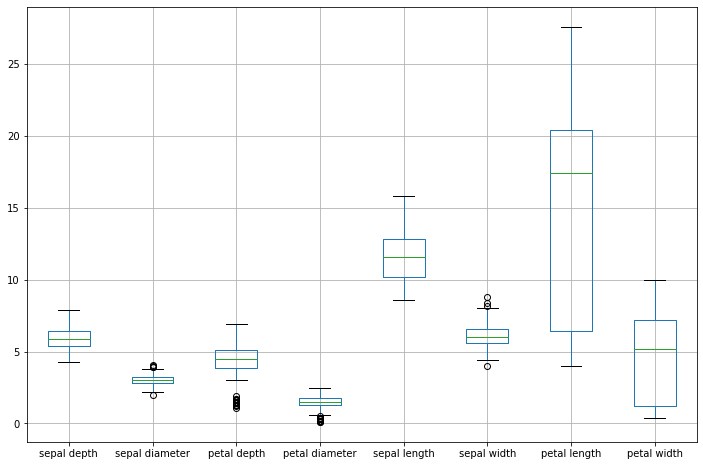

In [63]:
data.boxplot(figsize=(12,8))

# Here box and whisker plot is used to visualize any outliers present in the data.

In [64]:
# applying log transformation
data['sepal diameter'] = np.log10(data['sepal diameter'])
data['sepal depth'] = np.log10(data['sepal depth'])
data['petal diameter'] = np.log10(data['petal diameter'])
data['petal depth'] = np.log10(data['petal depth'])
data.describe()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.766711,0.474301,0.577021,0.104104,11.686667,6.108000,15.034667,4.794667
std,0.057337,0.055503,0.215248,0.290881,1.656132,0.867189,7.057682,3.052643
min,0.633468,0.301030,0.041393,-1.000000,8.600000,4.000000,4.000000,0.400000
25%,0.732394,0.447158,0.582604,0.113943,10.200000,5.600000,6.400000,1.200000
50%,0.767156,0.477121,0.653213,0.176091,11.600000,6.000000,17.400000,5.200000
75%,0.806180,0.505150,0.707570,0.255273,12.800000,6.600000,20.400000,7.200000
max,0.897627,0.612784,0.838849,0.397940,15.800000,8.800000,27.600000,10.000000


In [65]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in (['petal depth','petal diameter','sepal depth','sepal diameter']):
    data=remove_outlier(data,i)
data.describe()

In [66]:
# After performing log transformation or outlier removal on this data, Log tranformation seems a much better 
# approach in this case as it does not reduce the size of data while minimizing the outliers.

### Correlation and removing correlated columns

<AxesSubplot:>

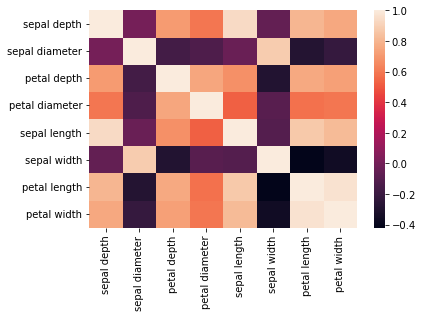

In [68]:
import seaborn as sns
sns.heatmap(data.corr())

In [ ]:
# Judging by this heatmap, we can see that most of the areas in heat map are towards darker side of gradient.
# However the minimum correlation does not exceed a correlation of -0.5. So judging by this there is not very much high
# correlation between the data. However we may still need further analysis to find out any columns that are highly correlated
# such as petal diameter and width may be highly related based on measuring criterias.